Bucholtz, A. (1995) vs Python module - Discrepancies
====================================================

Rayleigh-scattering calculations for the terrestrial atmosphere
---------------------------------------------------------------
Bucholtz, A., Applied Optics, Vol. 34, No. 15 (1995)


Introduction
------------

Bates managed to tabulate thirty-six (36) values of the *depolarization factor* ($\rho_n$) as a function of *wavelength* ($\lambda$), in 1984. Using the values of $\rho_n$, $\lambda$ and *refractive index* ($n_s$), a calculation of the *total Rayleigh-scattering cross section* ($\sigma$) is possible.


Bucholtz applied a linear interpolation on Bate’s $\rho_n$ values, and along with a more accurate approximation of the $n_s$, he came up with eighty (80) tabulated $\sigma$ values, in 1995.


An algorithmic approach to Bucholtz method is attempted in this article.

Formulas
--------

The following equations are used in the algorithm:

1. $$n_s =\left\{\begin{array}{ll}[8060.51 + \frac{2480990}{132.274 - (1/\lambda)^2} + \frac{17455.7}{39.32957-(1/\lambda)^2}] \cdot 10^{-8} + 1  & \mbox{if } n_s < 0.23 \mu m \\
[\frac{5791817}{238.0185 - (1/\lambda)^2} + \frac{167909}{57.362 - (1 /\lambda)^2}] \cdot 10^{-8} + 1 & \mbox{if } n_s > 0.23 \mu m	\end{array} \right.$$  
where:  
$n_s$: refractive index for standard air  
$\lambda$: wavelength ($\mu m$)

2. $\sigma(\lambda) = \frac{24\pi^3 (n_s^2 - 1)^2}{\lambda^4 N_s^2 (n_s^2 + 2)^2} (\frac{6 + 3p_n}{6-7p_n})$  
where:  
$\sigma$: total Rayleigh-scattering cross section, ($cm^2$)  
$\lambda$: wavelength (cm)  
$N_s$: molecular number density for standard air ($2.54743 \cdot 10^{19} cm^{-3}$)  
$\rho_n$: depolarization factor

3. $\beta_s(\lambda) = N_s \cdot \sigma(\lambda)$  
where:  
$\beta_s$: Rayleigh volume-scattering coefficient

Process
-------
The *Table 1* consists of thirty-six (36) tabulated values for each of the following physical quantities: $\lambda$, $F_k$, $\rho_n$ and $\gamma$.

The *Table 2* consists of eighty (80) tabulated values for each of the following physical quantities: $\lambda$, $\sigma$ and $\beta_s$.

1. A linear interpolation is applied to the *Table 1* values, according to the $\lambda$ values of the *Table 2*. The outcome is eighty (80) interpolated values for each of the $\lambda$, $F_k$, $\rho_n$ and $\gamma$.
2. Use *equation I* to calculate eighty (80) $n_s$ values.
3. Use *equation II* to calculate eighty (80) $\sigma$ values.
4. Use *equation III* to calculate eighty (80) $\beta_s$ values.

Validation
----------
The eighty (80) linearly interpolated values of $\rho_n$, that were used for the derivation of the *Table 2* physical quantities, are not included in Bucholtz’s paper. Thus, we assume that his linear interpolation produced the following values:

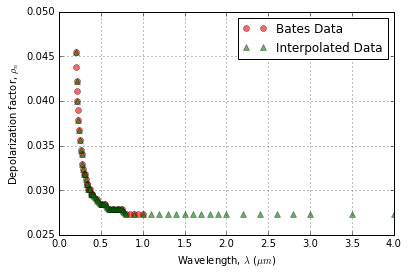

In [1]:
from molecular.rayleigh_scattering_bucholtz import *
import os
import matplotlib.pyplot as plt

# Make plots appear inline with text.
%matplotlib inline

# Get the data path.
current_path = os.getcwd()
data_base_path = os.path.join(current_path, "../data/bucholtz_tabular_values/")

# Specify the data file.
filename_table_1 = os.path.join(data_base_path, "bucholtz_1995_table_1.csv")
filename_table_2 = os.path.join(data_base_path, "bucholtz_1995_table_2.csv")
        
# Load the Bucholtz tabular data.
table_1 = np.loadtxt(filename_table_1, delimiter='\t', skiprows=1)
table_2 = np.loadtxt(filename_table_2, delimiter='\t', skiprows=1)

# Interpolate the depolarization factor values.
rho_n_interp = np.interp(table_2[:,0], table_1[:,0], table_1[:,2])

# Plot the interpolated data vs the original data.
fig_1 = plt.figure(0)
plt.plot(1E-3 * table_1[:,0], table_1[:,2], 'ro', alpha=0.6, label='Bates Data')
plt.plot(1E-3 * table_2[:,0], rho_n_interp, 'g^', alpha=0.6, label='Interpolated Data')
plt.xlabel(r"Wavelength, $\lambda$ ($\mu m$)")
plt.ylabel(r"Depolarization factor, $\rho_n$")
plt.grid('on')
plt.legend()
plt.show(fig_1)

Note: $\rho_n(1 \leq \lambda \leq 4) = 2.730 \cdot 10^{-2}$, where $\lambda$ is in $\mu m$.

Our calculations are made using floating-point numbers with 64-bit precision. Naturally, this process produces much greater accuracy than the maximum $10^{-33}$ that is depicted in *Table 2*. Consequently, a rounding of the raw calculated values is applied, in order to match the precision in Bucholtz’s paper.

Finally, a comparison of the rounded calculated values with the *Table 2* values, is made:

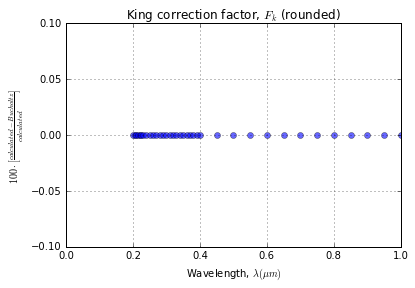

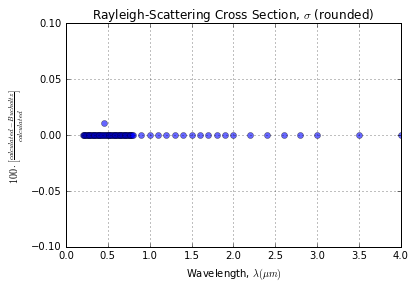

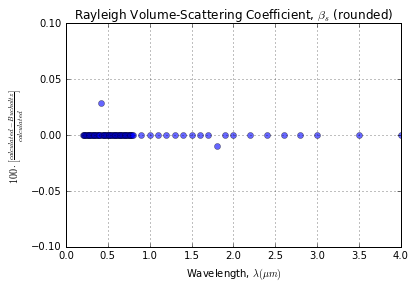

In [2]:
# Function for plotting the data comparison.
def test_plot(x, data_calculated, data_reference, y_limits, style, the_title, filename):
    """
    Plots the relative difference between the calculated data and the referenced
    data. See References below.
    
    Parameters
    ----------
    x: float
       The x-axis values.
    data_calculated: float
       The calculated values for the given physical quantity.
    data_reference: float
       The values used as reference.
    y_limits: list
       The y-axis limits.
    style: string
       The style of the plot.(eg. 'bo' produces blue circles)
    the_title: string
       The title of the plot.
    filename: string
       The plot's file name.
       
    Returns
    -------
    fig: plot
       The plot along with its file.
       
    References
    ----------
    Bucholtz, A. Rayleigh-scattering calculations for the terrestrial atmosphere.
    Applied Optics, Vol. 34, No. 15, 2766-2773 (1995)
    """
    # Convert nanometers to micrometers.
    x = x * 1E-3
    
    # Create figure.
    fig = plt.figure()
    plt.plot(x, 1E+2 * (data_calculated - data_reference) / data_calculated, style, alpha=0.6)
    
    # Set title and axis labels.    
    plt.title(the_title)
    plt.xlabel(r'Wavelength, $\lambda (\mu m)$')
    plt.ylabel(r'$100 \cdot [\frac{calculated - Bucholtz}{calculated}]$')
    
    # Enable grid.
    plt.grid(True)
    
    # Set the axis limits.
    plt.xlim([0, x[-1]])
    plt.ylim(y_limits)
    
    # Save and show the figure.    
    #plt.savefig(filename, bbox_inches='tight', dpi = 300)
    plt.show(fig)
    
    return None

# Calculate the King correction factor.
f_k = king_correction_factor(table_1[:, 0])

# Round the values to the desired decimal.
f_k_rounded = np.around(f_k, decimals=3)

# Calculate the Rayleigh scattering cross section. (cm^2)
sigma = scattering_cross_section(table_2[:, 0])

# Round the values to the desired decimal.
sigma_rounded = np.copy(sigma)
sigma_rounded[0:7] = np.around(sigma[0:7], decimals=28)
sigma_rounded[7:26] = np.around(sigma[7:26], decimals=29)
sigma_rounded[26:60] = np.around(sigma[26:60], decimals=30)
sigma_rounded[60:67] = np.around(sigma[60:67], decimals=31)
sigma_rounded[67:75] = np.around(sigma[67:75], decimals=32)
sigma_rounded[75:] = np.around(sigma[75:], decimals=33)

# Calculate the total Rayleigh volume-scattering coefficient. (km^-1)
beta = volume_scattering_coefficient(table_2[:, 0], P_s, T_s)

# Round the values to the desired decimal.
beta_rounded = np.copy(beta)
beta_rounded[0:13] = np.around(beta[0:13], decimals=4)
beta_rounded[13:37] = np.around(beta[13:37], decimals=5)
beta_rounded[37:63] = np.around(beta[37:63], decimals=6)
beta_rounded[63:70] = np.around(beta[63:70], decimals=7)
beta_rounded[70:78] = np.around(beta[70:78], decimals=8)
beta_rounded[78:] = np.around(beta[78:], decimals=9)


# Compare the rounded data to Bucholtz values.
y_lim = [-1E-1, +1E-1]
style = 'bo'
test_plot(table_1[:,0], f_k_rounded, table_1[:,1], y_lim, style, r'King correction factor, $F_k$ (rounded)', 'f_k_rounded.png')
test_plot(table_2[:,0], sigma_rounded, table_2[:,1], y_lim, style, r'Rayleigh-Scattering Cross Section, $\sigma$ (rounded)', 'sigma_rounded.png')
test_plot(table_2[:,0], beta_rounded, table_2[:,2], y_lim, style, r'Rayleigh Volume-Scattering Coefficient, $\beta_s$ (rounded)', 'beta_rounded.png')

The observed discrepancies are summarized in the following table:

<table style="width:100%">
  <caption>Discrepancies between the Python Script and the Bucholtz tabular values</caption>
  <tr>
    <th>Physical Quantity</th>
    <th>Bucholtz value</th>
    <th>Raw value</th>
    <th>Wavelength (&mu;m)</th>
  </tr>
  <tr>
    <td>Rayleigh Scattering Cross Section, &sigma; (cm<sup>-2</sup>)</td>
    <td>9.378 &middot; 10<sup>-27</sup></td>
    <td>9.3785376 &middot; 10<sup>-27</sup></td>
    <td>0.46</td>
  </tr>
  <tr>
    <td rowspan="2">Rayleigh Volume-Scattering Coefficient, &beta;<sub>s</sub> (km<sup>-1)</sup></td>
    <td>3.479 &middot; 10<sup>-2</sup></td>
    <td>3.4795083 &middot; 10<sup>-2</sup></td>
    <td>0.42</td>
  </tr>
  <tr>
    <td>9.656 &middot; 10<sup>-5</sup></td>
    <td>9.6554918 &middot; 10<sup>-5</sup></td>
    <td>1.80</td>
  </tr>
</table>

In order to assess these discrepancies more accurately, the raw (unrounded) calculated values for the $\sigma$ and $\beta_s$ are depicted below:

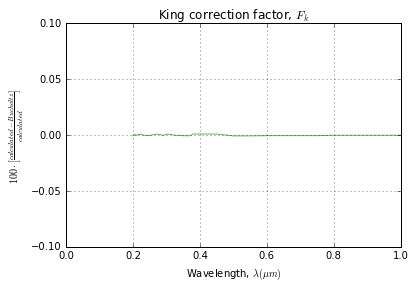

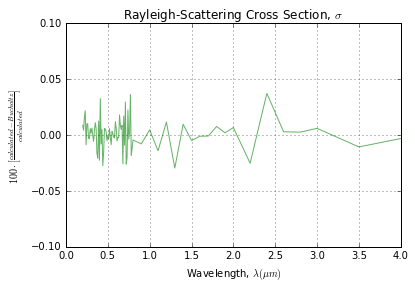

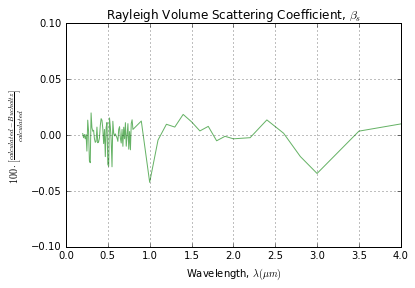

In [3]:
# Compare the raw data to Bucholtz values.
style = 'g'
test_plot(table_1[:,0], f_k, table_1[:,1], y_lim, style, r'King correction factor, $F_k$', 'f_k.png')
test_plot(table_2[:,0], sigma, table_2[:,1], y_lim, style, r'Rayleigh-Scattering Cross Section, $\sigma$', 'sigma.png')
test_plot(table_2[:,0], beta, table_2[:,2], y_lim, style, r'Rayleigh Volume Scattering Coefficient, $\beta_s$', 'beta.png')

A validation of the phase function follows.

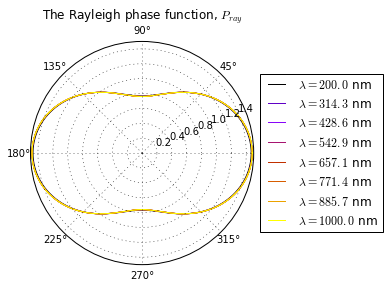

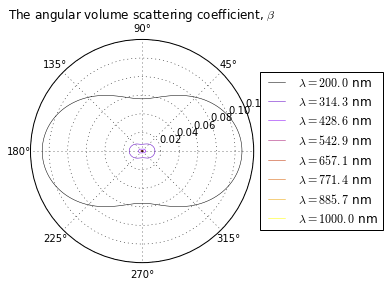

In [73]:
# Define scattering angle.
theta = np.linspace(0, 2 * np.pi, 360)

# Define the wavelength.
wavelength = np.linspace(table_1[0,0], table_1[-1,0], 8)

# Preallocate arrays for the variables to be calculated.
rows = np.size(wavelength, axis=0)
cols = np.size(theta, axis=0)
f_ray = np.zeros([rows, cols])
beta_ang = np.zeros([rows, cols])

# Calculate the Rayleigh phase function.
for kk in range(rows):
    f_ray[kk,:] = rayleigh_phase_function(theta, wavelength[kk])

# Calculate the angular volume scattering coefficient.
for kk in range(rows):
    beta_ang[kk,:] = angular_volume_scattering_coefficient(wavelength[kk], P_s, T_s, theta)

# Create colormap.
cmap = plt.get_cmap('gnuplot')
colors = [cmap(kk) for kk in np.linspace(0, 1, rows)]

#  Plot the phase function.
fig_1 = plt.figure(0)
ax = plt.subplot(111, projection='polar')
for kk in range(rows):
    ax.plot(theta, f_ray[kk,:], color = colors[kk], label=r"$\lambda = %.1f$ nm"%wavelength[kk], linewidth=1)
ax.set_title(r"The Rayleigh phase function, $P_{ray}$", va='bottom')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show(fig_1)

#   Plot the angular volume scattering coefficient.
fig_2 = plt.figure(1)
ax = plt.subplot(111, projection='polar')
for kk in range(rows):
    ax.plot(theta, beta_ang[kk,:], color = colors[kk], label=r"$\lambda = %.1f$ nm"%wavelength[kk], linewidth=0.5)
ax.set_title(r"The angular volume scattering coefficient, $\beta$", va='bottom')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show(fig_2)